In [1]:
import pandas as pd
import numpy as np
import copy

In [2]:
input_path = 'input/'
output_path = 'output/'
input_file_name = 'online_shoppers_intention.csv'

month_dict_mapping = {'Feb':2, 'Mar':3, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
visitor_dict_mapping = {'New_Visitor':1, 'Returning_Visitor':2, 'Other':3}
weekend_dict_mapping = {False:0, True:1}
revenue_dict_mapping = {False:0, True:1}

In [3]:
original_data = pd.read_csv(input_path + input_file_name)

In [4]:
original_data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
original_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
original_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
original_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
encoded_data = original_data.copy(deep = True)

encoded_data.Month = original_data.Month.map(month_dict_mapping)
encoded_data.VisitorType = original_data.VisitorType.map(visitor_dict_mapping)
encoded_data.Weekend = original_data.Weekend.map(weekend_dict_mapping)
encoded_data.Revenue = original_data.Revenue.map(revenue_dict_mapping)

original_data.head()
encoded_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [9]:
original_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
ordinal_columns = ['Administrative', 'Informational', 'ProductRelated']
numerical_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

In [12]:
# for colm in ordinal_columns:
#     sns.catplot(x=colm, kind="count", data=original_data)

In [13]:
# for colm in ordinal_columns:
#     sns.distplot(original_data[colm])
#     plt.show()

In [14]:
# sns.catplot(x='VisitorType', y='Revenue', kind="bar", data=original_data)

In [15]:
# sns.catplot(x='VisitorType', hue='Revenue', kind="count", data=original_data)

In [16]:
obj_level_colms = ['Month', 'VisitorType', 'Weekend', 'Revenue']
for colm in obj_level_colms:
    print(original_data.loc[:,colm].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']
[False  True]
[False  True]


In [17]:
encoded_data.corr().median().mean()

0.02380771578852128

In [18]:
encoded_data.Administrative.count()

12330

In [19]:
encoded_data['Random'] = np.random.randint(0,28,12330)
encoded_data.Random.value_counts()

24    478
8     473
3     473
15    473
22    469
6     465
4     456
14    455
12    454
23    450
0     449
1     448
13    444
21    443
16    442
27    439
19    435
11    434
7     433
2     432
17    428
26    427
20    419
9     410
10    407
18    403
5     402
25    389
Name: Random, dtype: int64

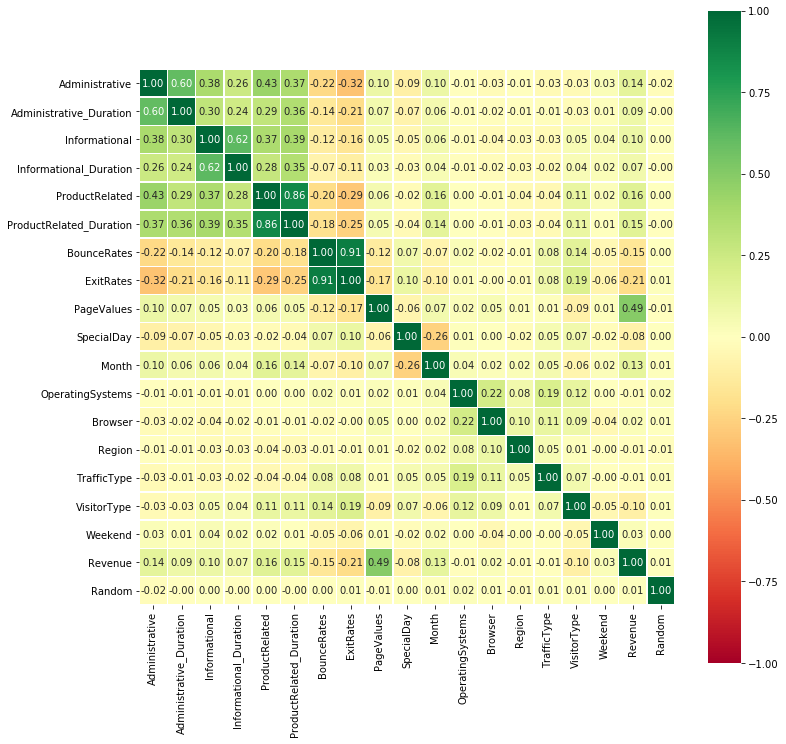

In [20]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data = encoded_data.corr(), cmap = 'RdYlGn', linewidths = 0.5,  vmin = -1, vmax = 1, annot = True, square = True, fmt=".2f")

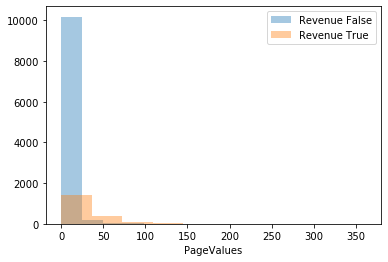

In [21]:
# Histograms for each species
sns.distplot(a=original_data.PageValues[original_data.Revenue == False], label="Revenue False", kde=False, bins = 10)
sns.distplot(a=original_data.PageValues[original_data.Revenue == True], label="Revenue True", kde=False, bins = 10)

# Force legend to appear
plt.legend()

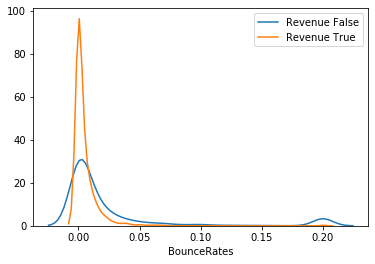

In [22]:
sns.distplot(a=original_data['BounceRates'][original_data.Revenue == False], label="Revenue False", kde=True, hist=False)
sns.distplot(a=original_data['BounceRates'][original_data.Revenue == True], label="Revenue True", kde=True, hist=False)
plt.legend()